In [74]:
import random

import pandas as pd
from utils import plot_listen_examples
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (19,7)

In [2]:
dataset_path = 'data/datasets/anurasetv3/audio/'
metadata_path = 'data/datasets/anurasetv3/metadata.csv'

In [3]:
df = pd.read_csv(metadata_path)
df.shape

(93378, 50)

In [4]:
df.head(1)

sample_name                      fname  min_t  max_t       site  \
0  SAMPLE_00000.wav  INCT20955_20190904_003000      0      3  INCT20955   

                  date  species_number subset  SPHSUR  BOABIS  ...  SCINAS  \
0  2019-09-04 00:30:00               2   test       1       1  ...       0   

   LEPNOT  ADEMAR  BOAALM  PHYDIS  RHIORN  LEPFLA  SCIRIZ  DENELE  SCIALT  
0       0       0       0       0       0       0       0       0       0  

[1 rows x 50 columns]

Text(0.5, 1.0, 'Spase Matrix of presence/absence in Anuraset. Each row if an audio sample and each column is a specie')

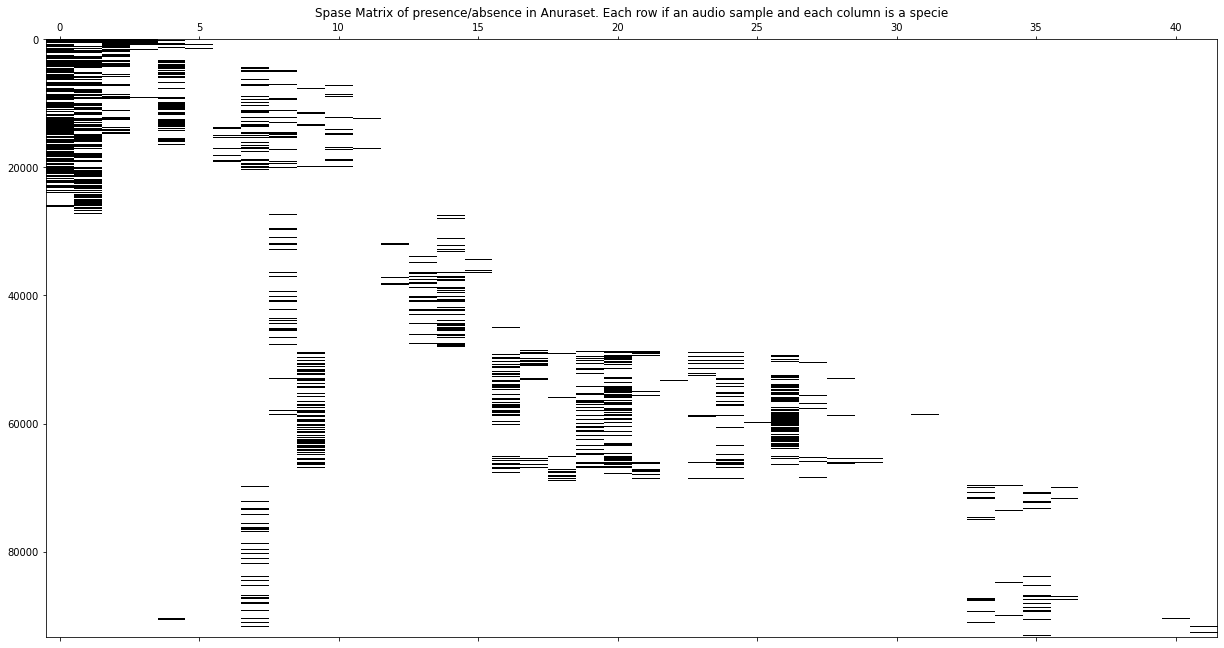

In [12]:
fig, ax = plt.subplots(figsize=(21,11))
plt.spy(df[df.columns[8:]], aspect='auto')
plt.title('Spase Matrix of presence/absence in Anuraset. Each row if an audio sample and each column is a specie')

In [ ]:
"""
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512)
util.plot_spectrogram(Sxx, extent=ext, db_range=80, colorbar=False)
con maad
los parámetros más importantes son: nperseg, noverlap y db_range
nperseg=1024 si fs=44.1o 48kHz
pero 512 si fs = 22.050kHz
y noverlap al 50%, es decir nperseg*0.5
db_range entre 60 y 100 dB
depende de la señal

"""

SAMPLE_66136.wav


sample_name                   fname  min_t  max_t    site  \
66136  SAMPLE_66136.wav  INCT17_20201114_201500     18     21  INCT17   

                      date  species_number subset  SPHSUR  BOABIS  ...  \
66136  2020-11-14 20:15:00               9   test       0       0  ...   

       SCINAS  LEPNOT  ADEMAR  BOAALM  PHYDIS  RHIORN  LEPFLA  SCIRIZ  DENELE  \
66136       0       0       0       0       0       0       0       0       0   

       SCIALT  
66136       0  

[1 rows x 50 columns]

['DENMIN', 'PITAZU', 'DENNAN', 'PHYALB', 'LEPLAB', 'BOARAN', 'SCIFUV', 'ELAMAT', 'PHYNAT']


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


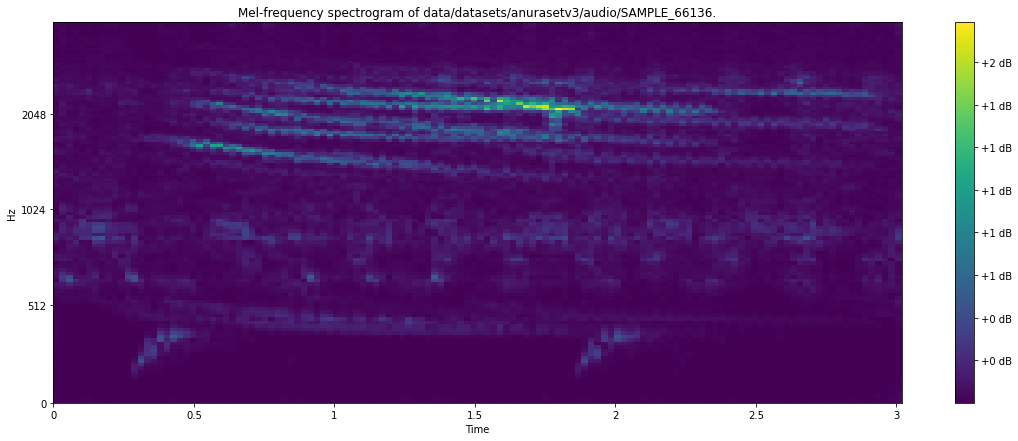

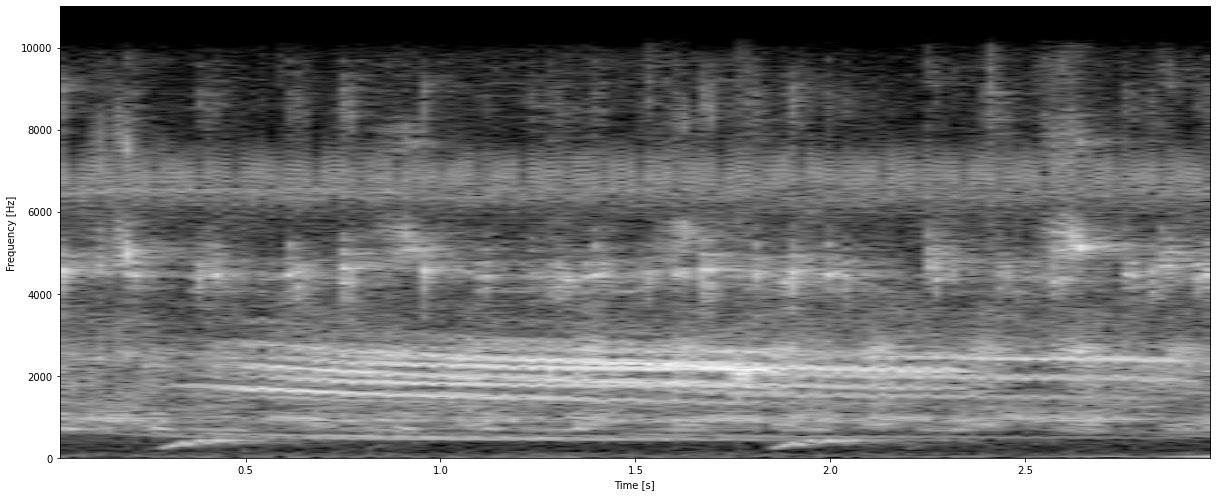

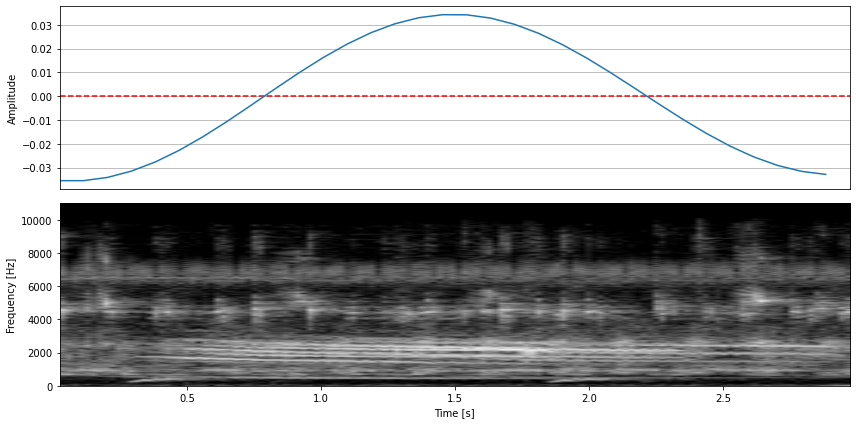

In [13]:
for i in df.sort_values(by=['species_number'], ascending=False)['sample_name'][:1]:
    print(i)
    display(df[df['sample_name']==i])
    print([df.columns[8:][j] for j,i in enumerate(df[df['sample_name']==i].values[0][8:]) if i==1])
    plot_listen_examples(dataset_path+i)


# evaluate autocorrelation

Autocorrelation estimates the influence of all past observed values on the currently observed value. This differs from partial autocorrelation in which only a single past observed value is measured for influence on the currently observed value.

In [83]:
df_std = df.groupby(['fname'])['species_number'].std().to_frame()
df_std.columns = ['std']
df_std['std'].describe()

count    1612.000000
mean        0.345183
std         0.299451
min         0.000000
25%         0.000000
50%         0.408619
75%         0.548946
max         1.959434
Name: std, dtype: float64

In [89]:
df_std['std'].value_counts(normalize=True)*100

0.000000    35.359801
0.255609     0.868486
0.503166     0.806452
0.466675     0.682382
0.499546     0.682382
              ...    
0.496814     0.062035
0.727350     0.062035
0.634985     0.062035
0.620286     0.062035
0.445001     0.062035
Name: std, Length: 595, dtype: float64

<AxesSubplot:xlabel='species_number', ylabel='Count'>

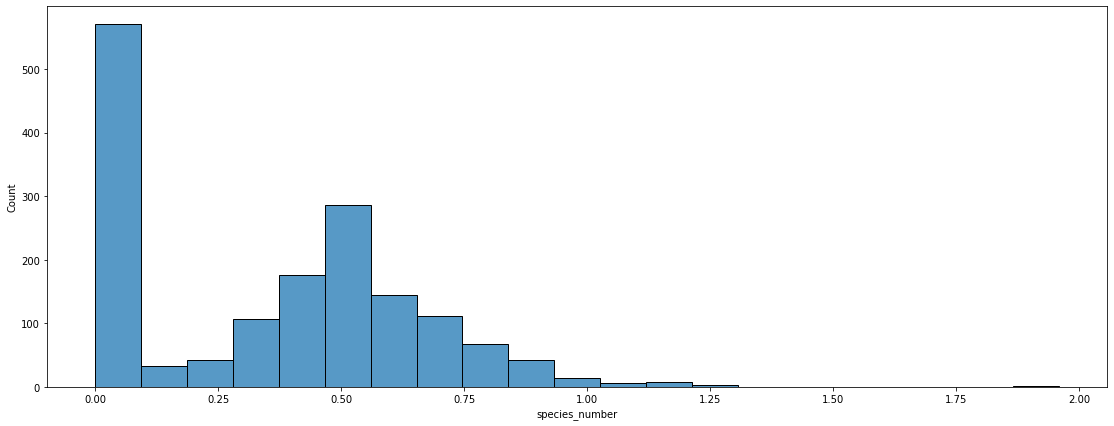

In [77]:
sns.histplot(data=df_std, x="std",
             #binwidth=1
            )

In [81]:
df[df['fname'].isin(df_std[df_std['species_number']==0].index)]['species_number'].describe()

count    33053.000000
mean         0.533446
std          0.975096
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: species_number, dtype: float64

<AxesSubplot:xlabel='species_number', ylabel='Count'>

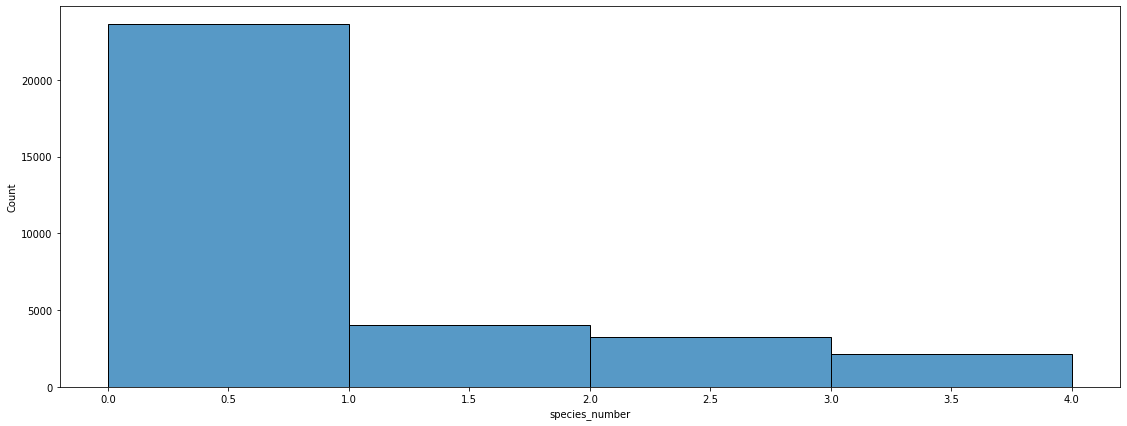

In [92]:
sns.histplot(data=df[df['fname'].isin(df_std[df_std['std']==0].index)], 
             x="species_number",
             binwidth=1
            )

In [97]:
raw_audio_path = 'data/raw/audio/INCT20955/'

INCT20955_20190904_003000


Empty DataFrame
Columns: [sample_name, fname, min_t, max_t, site, date, species_number, subset, SPHSUR, BOABIS, SCIPER, DENNAH, LEPLAT, RHIICT, BOALEP, BOAFAB, PHYCUV, DENMIN, ELABIC, BOAPRA, DENCRU, BOALUN, BOAALB, PHYMAR, PITAZU, PHYSAU, LEPFUS, DENNAN, PHYALB, LEPLAB, SCIFUS, BOARAN, SCIFUV, AMEPIC, LEPPOD, ADEDIP, ELAMAT, PHYNAT, LEPELE, RHISCI, SCINAS, LEPNOT, ADEMAR, BOAALM, PHYDIS, RHIORN, LEPFLA, SCIRIZ, DENELE, SCIALT]
Index: []

[0 rows x 50 columns]

/anaconda/envs/trans_env/lib/python3.8/site-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


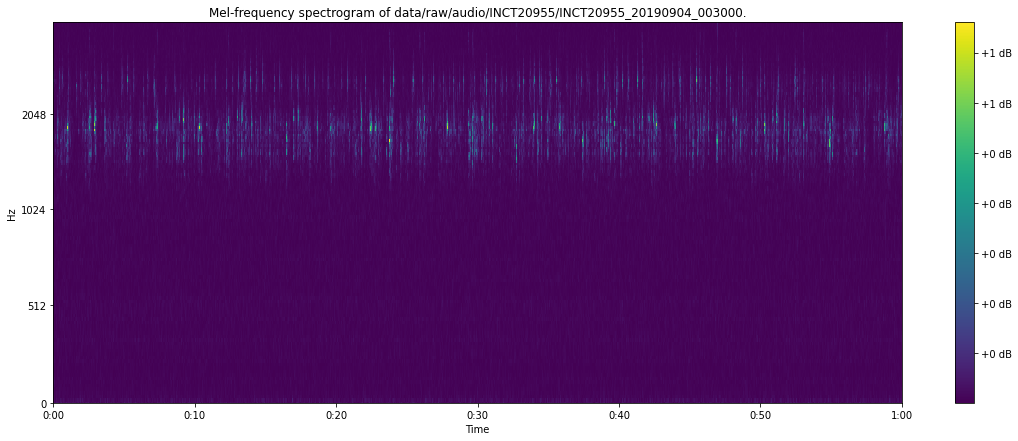

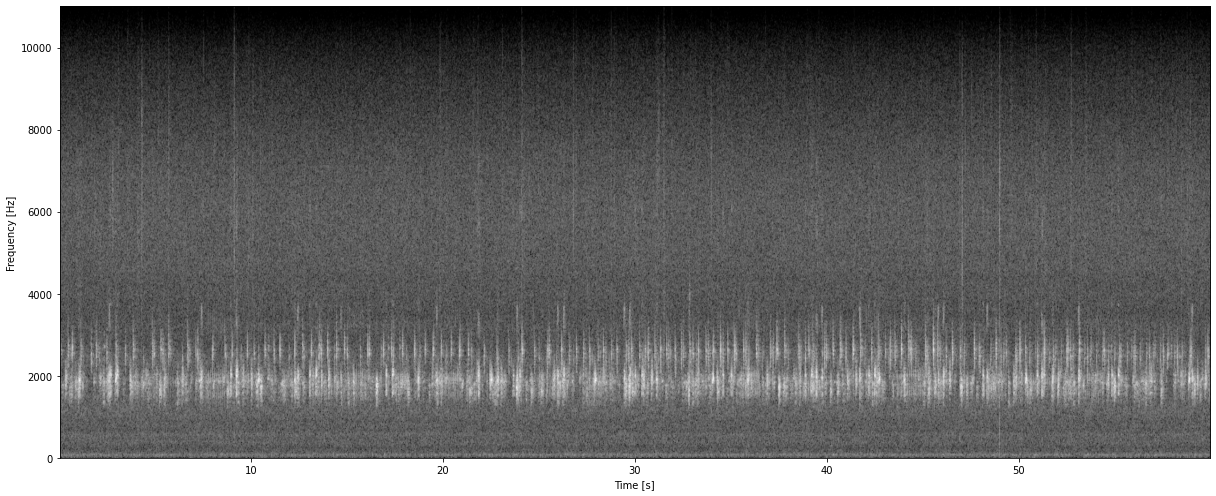

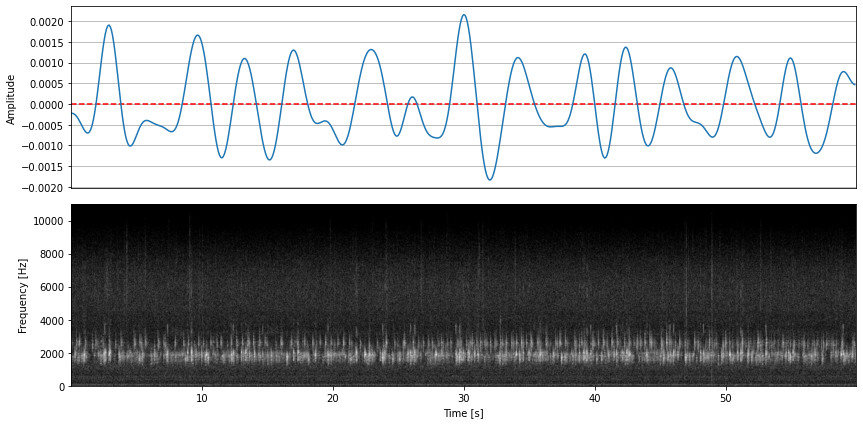

In [101]:
df_selected = df[df['fname'].isin(df_std[df_std['std']==0].index)]
for i in df_selected['fname'][:1]:
    print(i)
    display(df_selected[df_selected['sample_name']==i])
    #print([df.columns[8:][j] for j,i in enumerate(df_selected[df_selected['sample_name']==i].values[0][8:]) if i==1])
    plot_listen_examples(raw_audio_path+i+'.wav')

In [ ]:
# 1 Experiment: test experiments using sliding window 1, 2, 3
# 2 Experiment: test using train quality vs training all, testing all, what is the meaning of testing under bad quality?

# TODO: Understand Autocorrelation
# https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html
# https://en.wikipedia.org/wiki/Autocorrelation#Estimation
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
# https://towardsdatascience.com/understanding-autocorrelation-in-time-series-analysis-322ad52f2199
# https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/


In [15]:
s = pd.Series([1, 0, 0, 0])
s.autocorr()


nan

In [16]:
s = pd.Series([1,1,1,1,1,0,0,0,0])
s.autocorr()

0.7745966692414833

In [17]:
df['species_number'].autocorr()

0.9688308515487547

In [18]:
df.columns

Index(['sample_name', 'fname', 'min_t', 'max_t', 'site', 'date',
       'species_number', 'subset', 'SPHSUR', 'BOABIS', 'SCIPER', 'DENNAH',
       'LEPLAT', 'RHIICT', 'BOALEP', 'BOAFAB', 'PHYCUV', 'DENMIN', 'ELABIC',
       'BOAPRA', 'DENCRU', 'BOALUN', 'BOAALB', 'PHYMAR', 'PITAZU', 'PHYSAU',
       'LEPFUS', 'DENNAN', 'PHYALB', 'LEPLAB', 'SCIFUS', 'BOARAN', 'SCIFUV',
       'AMEPIC', 'LEPPOD', 'ADEDIP', 'ELAMAT', 'PHYNAT', 'LEPELE', 'RHISCI',
       'SCINAS', 'LEPNOT', 'ADEMAR', 'BOAALM', 'PHYDIS', 'RHIORN', 'LEPFLA',
       'SCIRIZ', 'DENELE', 'SCIALT'],
      dtype='object')

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data


<AxesSubplot:>

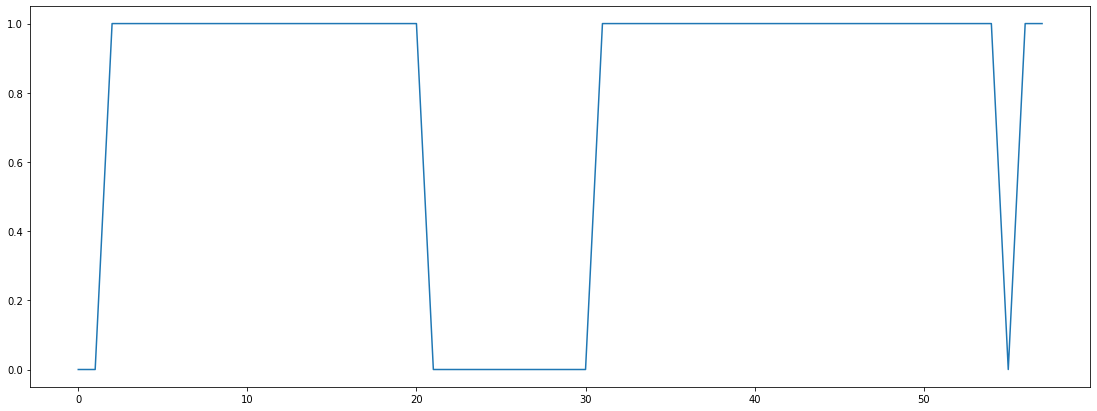

In [44]:
df[df['fname']=='INCT20955_20190909_171500']['species_number'].reset_index(drop=True).plot()

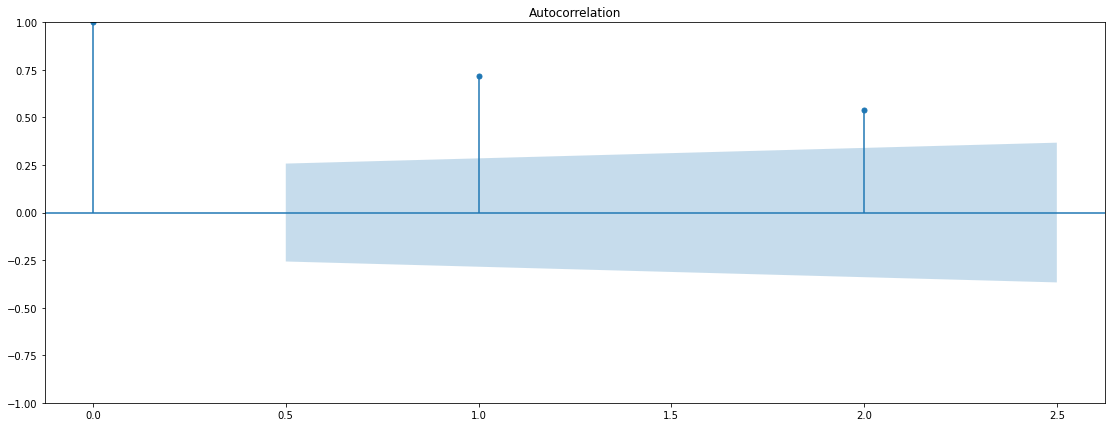

In [53]:
# Note: Limiting Lags to 50
data = df[df['fname']=='INCT20955_20190909_171500']['species_number']
plot_acf(data, lags=2)
# Show the AR as a plot
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(data=data, lags=50)
# Show the AR as a plot
plt.show()

In [104]:
df_record = df.groupby(['fname'])['species_number'].describe()
df_record['autocorrelation_lag=1'] = df.groupby(['fname'])['species_number'].apply(lambda x: x.autocorr(lag=1))
df_record['autocorrelation_lag=2'] = df.groupby(['fname'])['species_number'].apply(lambda x: x.autocorr(lag=2))
df_record['autocorrelation_lag=3'] = df.groupby(['fname'])['species_number'].apply(lambda x: x.autocorr(lag=3))

<AxesSubplot:xlabel='autocorrelation_lag=1', ylabel='std'>

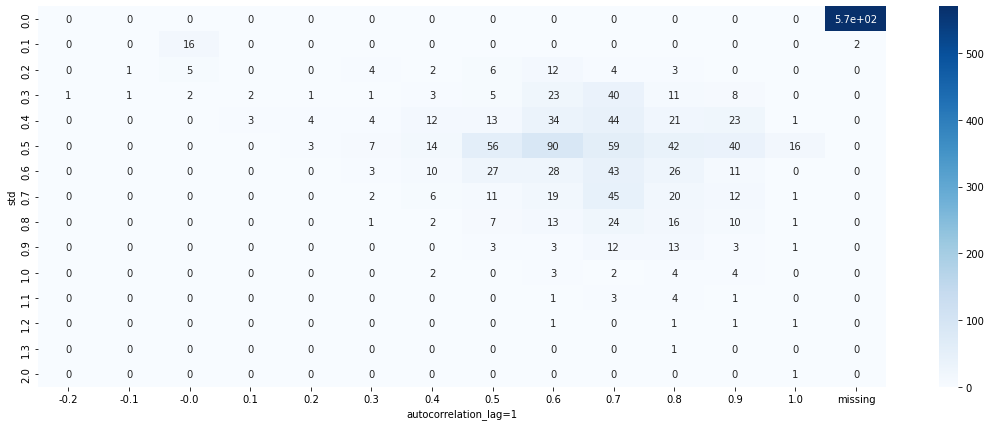

In [142]:
df_cross = pd.crosstab(df_record['std'].round(1),
                        df_record['autocorrelation_lag=1'].round(1).fillna('missing'),
                        dropna=False)

sns.heatmap(df_cross, annot=True,cmap='Blues')

In [149]:
df_record.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'autocorrelation_lag=1', 'autocorrelation_lag=2',
       'autocorrelation_lag=3'],
      dtype='object')

In [151]:
df_autocorrelation = df_record[['autocorrelation_lag=1', 'autocorrelation_lag=2',
                                'autocorrelation_lag=3']].melt()

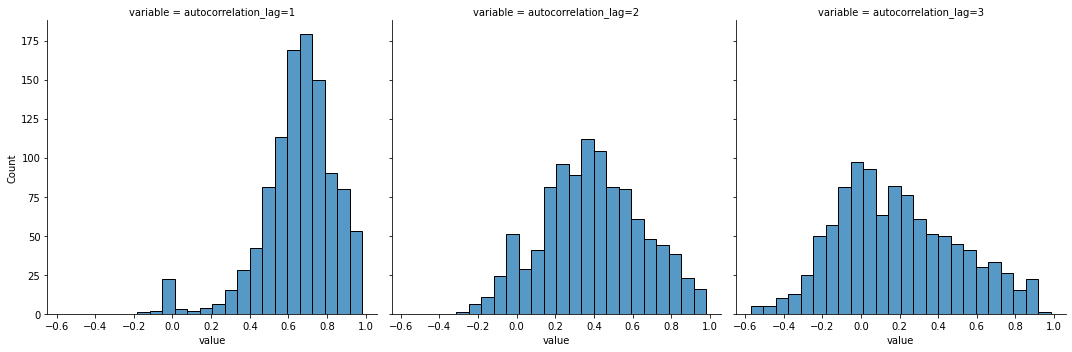

In [161]:
sns.displot(data=df_autocorrelation, x='value', col="variable"
            )

<AxesSubplot:xlabel='value', ylabel='Count'>

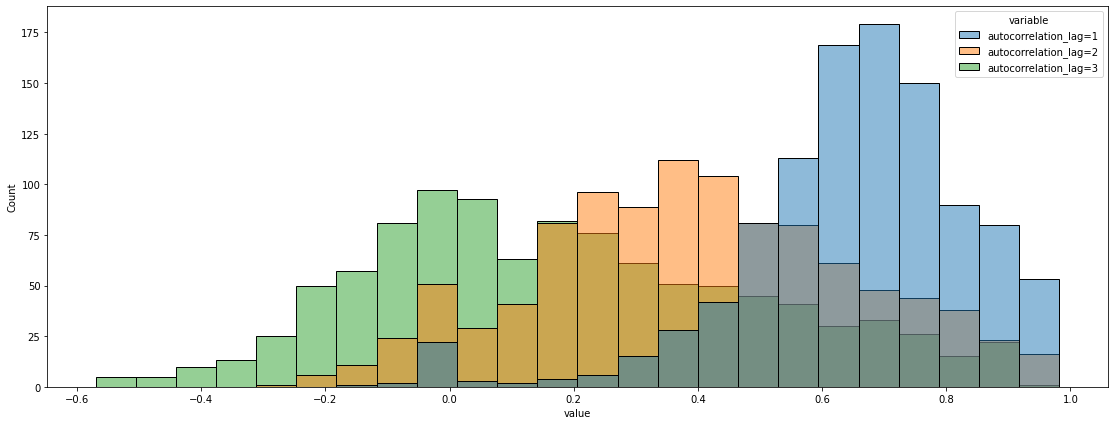

In [155]:
sns.histplot(data=df_autocorrelation, x='value',hue="variable", 
             #binwidth=1
            )

<AxesSubplot:xlabel='value', ylabel='Count'>

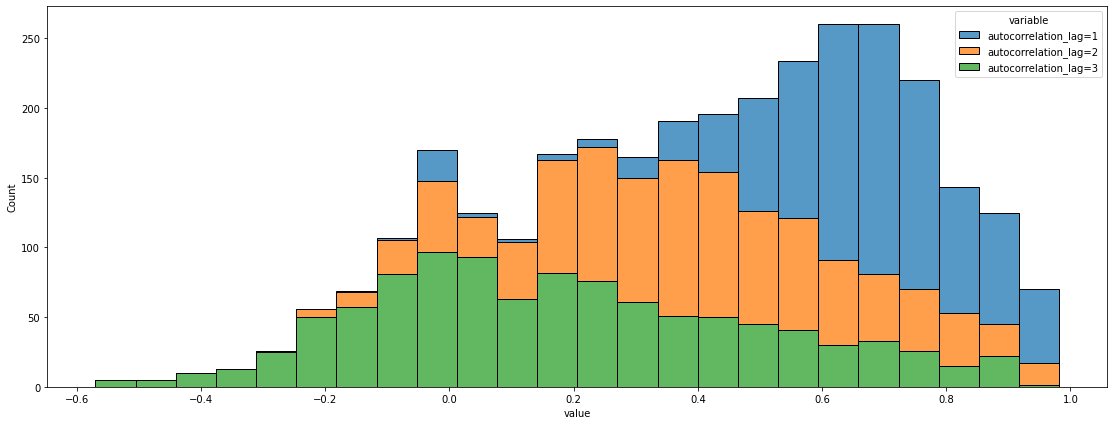

In [154]:
sns.histplot(data=df_autocorrelation, x='value',hue="variable", multiple="stack"
             #binwidth=1
            )

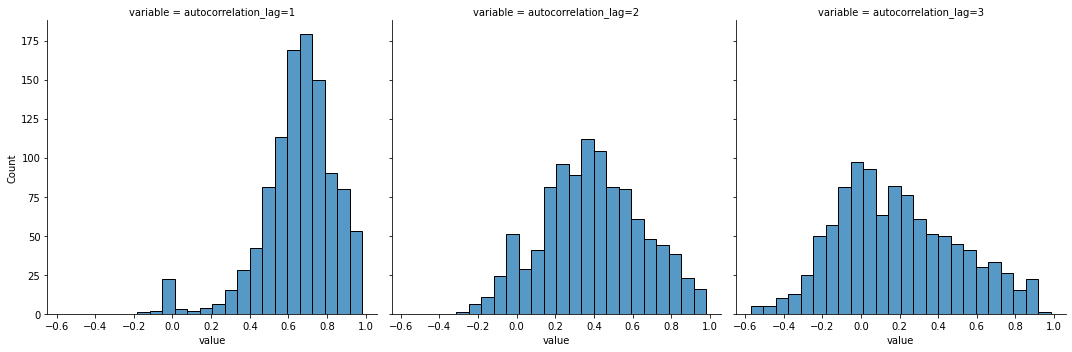

In [ ]:
sns.histplot(df.groupby(['fname'])['species_number'].apply(lambda x: x.autocorr(lag=1)).plot(kind='bar'))

In [ ]:
df[df['fname']=='INCT17_20191113_040000']['species_number'].autocorr()

In [ ]:
for i in range(5):
    i = random.choice(df['sample_name'])
    display(df[df['sample_name']==i])
    plot_listen_examples(dataset_path+i)


In [ ]:
#import shutil

#shutil.copyfile(dataset_path+'SAMPLE_66133.wav', 'data/datasets/'+'SAMPLE_66133.wav')

In [ ]:
!ls